In [1]:
from peak_warming_calculator_test  import *
import matplotlib.pyplot as plt

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [3]:
import time

# Sensitivity Analysis

In [4]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [5]:
problem = {
'num_vars': 6,
'names': ['gamma', 'D0', 'P_100', 'P_50/P_100', 's/r', 'TCRE_1'],
'bounds': [
[2*0.9, 2*1.1],
[0.00236*0.9, 0.00236*1.1],
[300*0.9, 300*1.1],
[0.4*0.9, 0.4*1.1],
[2*0.9, 2*1.1],
[0.00054*0.9, 0.00054*1.1]]
}

# Generate samples
param_values = saltelli.sample(problem, 64)    

In [6]:
param_values[0]

array([1.8093750e+00, 2.3120625e-03, 3.1921875e+02, 4.2687500e-01,
       2.0593750e+00, 5.3409375e-04])

In [7]:
len(param_values)

896

In [8]:
peak_T_list = []

for i in range(len(param_values)):
    if i % 32 == 0:
        print(i)
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        print(current_time)
    
    gamma = param_values[i][0]
    D0 = param_values[i][1]
    P_100 = param_values[i][2]
    P_50 = param_values[i][3] * P_100
    r = consumption_discount
    s = param_values[i][4]*r
    T_TCRE_1 = param_values[i][5]
    
    peak_T = peak_warming_calculator(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1)
    peak_T_list.append(peak_T)

0
18:55:29


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator_test.py:138: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


32
18:59:41
64
19:04:04
96
19:08:22
128
19:12:17
160
19:16:27
192
19:20:47
224
19:25:03
256
19:29:04
288
19:33:32
320
19:38:04
352
19:42:01
384
19:46:28
416
19:50:35
448
19:55:04
480
19:59:09
512
20:03:07
544
20:07:15
576
20:10:46
608
20:15:12
640
20:19:27
672
20:23:30
704
20:27:40
736
20:31:40
768
20:36:00
800
20:39:47
832
20:43:56
864
20:48:14


                  ST   ST_conf
gamma       0.771107  0.207663
D0          0.090751  0.025189
P_100       0.091312  0.041439
P_50/P_100  0.065548  0.020524
s/r         0.000270  0.000114
TCRE_1      0.020408  0.007830
                  S1   S1_conf
gamma       0.787481  0.310800
D0          0.068807  0.114996
P_100       0.089361  0.111439
P_50/P_100  0.062109  0.083485
s/r         0.000036  0.004104
TCRE_1      0.017026  0.046779
                            S2   S2_conf
(gamma, D0)          -0.024988  0.381778
(gamma, P_100)       -0.018603  0.432096
(gamma, P_50/P_100)  -0.013805  0.378887
(gamma, s/r)         -0.020454  0.365139
(gamma, TCRE_1)      -0.012706  0.372631
(D0, P_100)           0.048990  0.159765
(D0, P_50/P_100)      0.032636  0.152455
(D0, s/r)             0.033355  0.155969
(D0, TCRE_1)          0.027528  0.158775
(P_100, P_50/P_100)  -0.012694  0.126398
(P_100, s/r)         -0.013157  0.112231
(P_100, TCRE_1)      -0.010330  0.122008
(P_50/P_100, s/r)    -0.002761  0

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

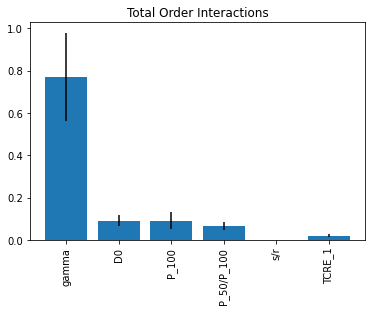

In [9]:
peak_T_list = np.asarray(peak_T_list)

Si = sobol.analyze(problem, peak_T_list, print_to_console=True)

total_Si, first_Si, second_Si = Si.to_df()

plt.title("Total Order Interactions")
plt.bar(total_Si.index, total_Si['ST'], yerr=total_Si['ST_conf'])
plt.xticks(rotation=90)